## RESEARCH PROJECT ON BANK CUSTOMER SEGMENTATION 
    Most banks have a large customer base - with different characteristics in terms of age, transaction_amount, transaction_time, location of customers, and more. Customer segmentation is the process of dividing a customer dataset into specific groups based on shared traits.

## Research Objective: - 

    The Goal of this project is to create a model that will help bank to segment their customers according to their Age,
    Recency value, Frequency value & Monetary value.
#### There are some questions I'd like to answer that will help us to learn more about customers and their behavior.
    1st :To find out the top 3 cities whose customers have the most money in their accounts.
    2nd :To find out the top 3 cities whose customers have transacted the most money.
    3rd :To find out whether male customers or female customers do more amount of transactions.
    4th :To find out whether male customers or female customers have more money in their accounts?
    5th :To find out on which day of the week the highest and lowest transactions took place and how much.
    6th :To find out in which month the highest and lowest transactions occurred and for what amount.
    7th :To find out which age group of customers do maximum transaction Amount.
    8th :To find out which age group of customers has maximum account balance.

## Data Collection
    We took dataset from kaggle. This dataset consists of 1 Million+ transaction by customers for a bank in India. The data contains information such as-TransactionID,CustomerID,CustomerDOB,CustGendere,CustLocation,CustAccountBalance,
    TransactionDate,TransactionTime,TransactionAmount (INR) etc.
    

### Import Necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import time
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer 
import warnings
warnings.filterwarnings("ignore")

### Load  & Check Dataset 

In [2]:
df = pd.read_csv("bank_transactions.csv")

In [3]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [4]:
df.shape

(1048567, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


From the above code, we get some insights and these are as follows:-
     
1. There are 1048567 rows and 9 columns in our data.
2. We found that there are some null values present in our data. 
3. We found that some numerical columns ["CustAccountBalance" & "TransactionAmount (INR)"] have data in float datatype.So, it is good to change their datatype into int.
4. We found that there are two date columns, but the datatype is object. For better analysis we need to convert it into datetime format.

## Data Preprocessing

In [6]:
df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

As we know Null values are not good. We drop null values because (3397,1100,151,2369) no. of rows is a small number as compare to our whole data (which contains of 1048567 no. of rows).

In [7]:
df.dropna(subset=['CustomerDOB'], inplace = True)
df.dropna(subset=['CustGender'], inplace = True)
df.dropna(subset=['CustLocation'], inplace = True)
df.dropna(subset=['CustAccountBalance'], inplace = True)

In [8]:
# Change datatypes
df['CustAccountBalance'] = df['CustAccountBalance'].astype(int)
df['TransactionAmount (INR)'] = df['TransactionAmount (INR)'].astype(int)
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [9]:
# Lets check value_count of gender attribute
df["CustGender"].value_counts()

M    760978
F    280635
T         1
Name: CustGender, dtype: int64

There is only one Transgender present in our data. Drop it

In [10]:
df.drop(df[df['CustGender'] == 'T'].index, inplace=True)

#### Find Customer Age 
#### To find customer's age we have to need customer birth year and current year.    
1. We extract year from CustomerDOB and the extract year will act as customer birth year.
2. Similarly we extract transaction year from TransactionDate and the extract year will act as current year. Together with we will also extract transaction_day and transaction_month from transaction_year for further analysis.

In [11]:
df['Birth_Year'] = df['CustomerDOB'].dt.year
df['Transaction_Year'] = df['TransactionDate'].dt.year
df['Transaction_Day'] = df['TransactionDate'].dt.day_name()
df['Transaction_Month'] = df['TransactionDate'].dt.month_name()

In [12]:
# Display the DataFrame
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Birth_Year,Transaction_Year,Transaction_Day,Transaction_Month
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819,2016-02-08,143207,25,1994,2016,Monday,February
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270,2016-02-08,141858,27999,2057,2016,Monday,February
2,T3,C4417068,1996-11-26,F,MUMBAI,17874,2016-02-08,142712,459,1996,2016,Monday,February
3,T4,C5342380,2073-09-14,F,MUMBAI,866503,2016-02-08,142714,2060,2073,2016,Monday,February
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714,2016-02-08,181156,1762,1988,2016,Monday,February


#### Lets Check Birth_Year & Transaction_Year Column which will help us to find out Customer_Age.

In [13]:
years = df["Birth_Year"].unique()
years.sort()
print(years)

[1800 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986
 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029
 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043
 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057
 2058 2059 2060 2061 2062 2063 2064 2065 2066 2067 2068 2069 2070 2071
 2072 2073]


Here we found that Some of the Birth_Year shown in wrong way like as 2057, as per our data which is 1957 (in row no. 2 and index no.1 of Birth_Year attribute).

In [14]:
df["Transaction_Year"].unique()

array([2016], dtype=int64)

 We find out that whole transaction are take place in 2016. It is impossible that Birth_Year of a customer is greater than 2016. So, we decide to subtract 100 from birth year those are greater than 2016 because system wrongly add 100 in them (like as 2073, as per data which is 1973 row no. 04 and index no.03)

#### From Research on Google
We get some knowledge about the minors i.e, minors lower than 10 years of age can not operate the account on their own. But some birth year are showing that some customers are minor below 10 years age like [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016] as per transaction year. Here we can say that these are also incorrectly changed by system.So finally we decide to decrease 100 from birth year those are greater than 2006 and finally get relevant date for Customer's Birth_Year.

In [15]:
df.loc[df['Birth_Year'] > 2006, 'Birth_Year'] -= 100

In [16]:
# Subtracting Birth_Year from Transaction_Year, we get Customer's Age
df["Customer_Age"] = df["Transaction_Year"] - df["Birth_Year"]

In [17]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Birth_Year,Transaction_Year,Transaction_Day,Transaction_Month,Customer_Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819,2016-02-08,143207,25,1994,2016,Monday,February,22
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270,2016-02-08,141858,27999,1957,2016,Monday,February,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874,2016-02-08,142712,459,1996,2016,Monday,February,20
3,T4,C5342380,2073-09-14,F,MUMBAI,866503,2016-02-08,142714,2060,1973,2016,Monday,February,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714,2016-02-08,181156,1762,1988,2016,Monday,February,28


###  Drop unnecessary columns from the dataset.

In [18]:
df = df.drop("CustomerDOB", axis =1)
df = df.drop("Birth_Year", axis = 1)
df = df.drop("TransactionTime", axis = 1)
df = df.drop("Transaction_Year", axis = 1)

### Finding & Treating Outliers

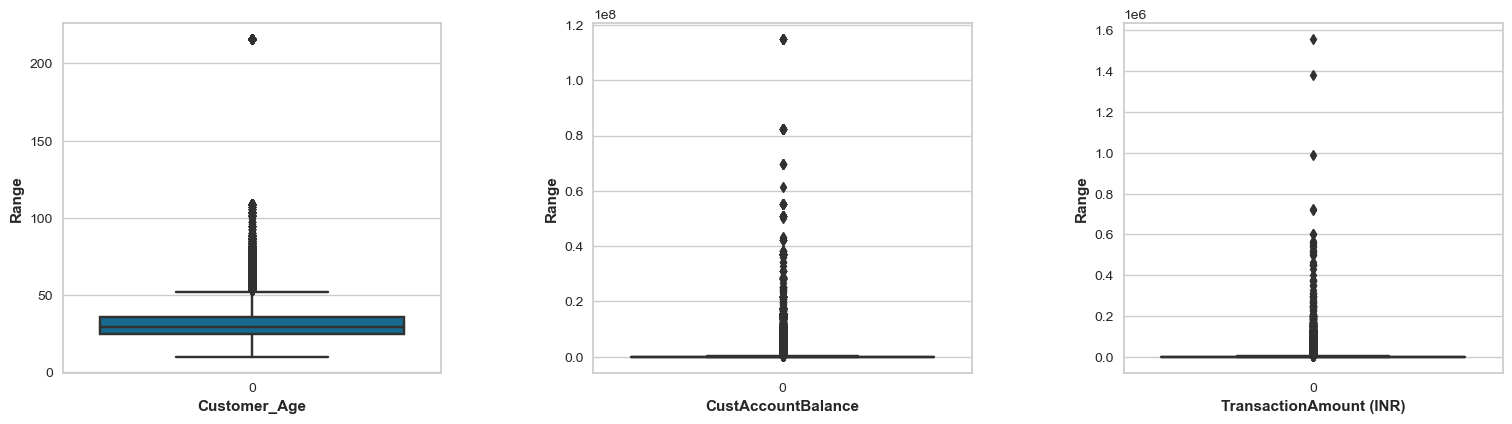

In [19]:
Columns = ["Customer_Age", "CustAccountBalance", "TransactionAmount (INR)"]
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Loop through columns and create boxplots
for i in range(3):
    sns.boxplot(data=df[Columns[i]], ax=ax[i])
    ax[i].set_xlabel(Columns[i], fontweight="bold")  
    ax[i].set_ylabel('Range', fontweight="bold")  

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.8, wspace=0.4, hspace=0.4)

plt.show()

In [20]:
# Function to treat outliers
def treat_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    df.loc[outliers, column] = upper_bound  # You can use lower_bound if you prefer
    return df

# List of columns to treat outliers
columns_to_treat = ["Customer_Age", "CustAccountBalance", "TransactionAmount (INR)"]

# Create a new DataFrame with treated outliers for each specified column to avoid modifying in main dataframe.
treated_df = df.copy()  

# Apply the treat_outliers function to each specified column
for column in columns_to_treat:
    treated_df = treat_outliers(treated_df, column)

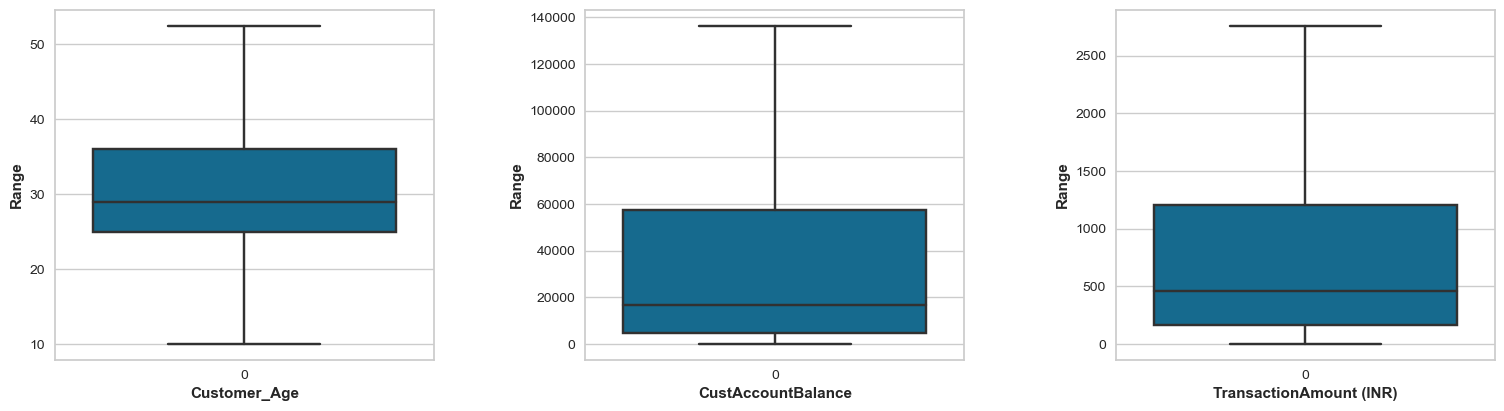

In [21]:
Columns = ["Customer_Age", "CustAccountBalance", "TransactionAmount (INR)"]
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Loop through columns and create boxplots
for i in range(3):
    sns.boxplot(data=treated_df[Columns[i]], ax=ax[i])
    ax[i].set_xlabel(Columns[i], fontweight="bold")  
    ax[i].set_ylabel('Range', fontweight="bold")  

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.8, wspace=0.4, hspace=0.4)

plt.show()

In [23]:
treated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041613 entries, 0 to 1048566
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041613 non-null  object        
 1   CustomerID               1041613 non-null  object        
 2   CustGender               1041613 non-null  object        
 3   CustLocation             1041613 non-null  object        
 4   CustAccountBalance       1041613 non-null  int32         
 5   TransactionDate          1041613 non-null  datetime64[ns]
 6   TransactionAmount (INR)  1041613 non-null  int32         
 7   Transaction_Day          1041613 non-null  object        
 8   Transaction_Month        1041613 non-null  object        
 9   Customer_Age             1041613 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(2), object(6)
memory usage: 79.5+ MB


We have to change datatype of CustAccountBalance & Customer_Age into int.

In [24]:
treated_df['CustAccountBalance'] = treated_df['CustAccountBalance'].astype(int)
treated_df['Customer_Age'] = treated_df['Customer_Age'].astype(int)
treated_df.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),Transaction_Day,Transaction_Month,Customer_Age
0,T1,C5841053,F,JAMSHEDPUR,17819,2016-02-08,25,Monday,February,22
1,T2,C2142763,M,JHAJJAR,2270,2016-02-08,2760,Monday,February,52
2,T3,C4417068,F,MUMBAI,17874,2016-02-08,459,Monday,February,20
3,T4,C5342380,F,MUMBAI,136478,2016-02-08,2060,Monday,February,43
4,T5,C9031234,F,NAVI MUMBAI,6714,2016-02-08,1762,Monday,February,28


#### Taking Random_Sample of 50,000 rows data from original dataframe because system becomes slow, when I run it on 1M rows data.

In [25]:
selected_columns = ['TransactionID','CustomerID', 'CustGender', 'CustLocation','Customer_Age','TransactionDate',
                    'Transaction_Day','Transaction_Month','TransactionAmount (INR)','CustAccountBalance']
df1 = treated_df.loc[:, selected_columns].sample(n=50000, random_state=42).reset_index(drop=True)
df1.head()

,TransactionID,CustomerID,CustGender,CustLocation,Customer_Age,TransactionDate,Transaction_Day,Transaction_Month,TransactionAmount (INR),CustAccountBalance
0,T631019,C7342133,M,DELHI,33,2016-08-29,Monday,August,200,126207
1,T201642,C8111562,M,NASHIK,26,2016-09-08,Thursday,September,69,212
2,T160269,C5940770,M,MUMBAI,27,2016-04-08,Friday,April,19,2965
3,T338525,C5797165,F,THANE WEST,26,2016-08-15,Monday,August,560,136478
4,T472085,C7826031,M,GUWAHATI,36,2016-08-21,Sunday,August,1000,0


In [26]:
# Write Random_Sample of 50,000 rows data into a CSV file
df1.to_csv('Bank_customer_data.csv', index=False)

### Find RFM (Recency, Frequency, Monetary) Values For Further Analysis
#### Recency (R) :
    This metric focuses on identifying customers who have made recent transactions. To calculate Recency, we determine the number of days since a customer's last transaction, with lower values indicating the least recency.
#### Frequency (F) :
    Frequency (F): The Frequency metric helps identify customers who make frequent purchases. It involves calculating the total number of purchases made by each customer, with higher values indicating a higher frequency of purchases.
#### Monetary (M) :
    Monetary Value (M): The Monetary Value metric enables us to pinpoint customers with high purchase amounts. It involves calculating the total amount of money spent by each customer, with higher values indicating a higher monetary value of purchases.
#### By utilizing these RFM metrics, we can effectively segment the customers and gain valuable insights into their behaviors. 

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            50000 non-null  object        
 1   CustomerID               50000 non-null  object        
 2   CustGender               50000 non-null  object        
 3   CustLocation             50000 non-null  object        
 4   Customer_Age             50000 non-null  int32         
 5   TransactionDate          50000 non-null  datetime64[ns]
 6   Transaction_Day          50000 non-null  object        
 7   Transaction_Month        50000 non-null  object        
 8   TransactionAmount (INR)  50000 non-null  int32         
 9   CustAccountBalance       50000 non-null  int32         
dtypes: datetime64[ns](1), int32(3), object(6)
memory usage: 3.2+ MB


In [28]:
# Recency: -
df1["max"] =df1["TransactionDate"].max()
df1["Days_number"] = (df1["max"] - df1["TransactionDate"]).dt.days
rfm_r = df1.groupby("CustomerID")["Days_number"].min().reset_index()
rfm_r.columns = ["CustomerID","Recency"]

In [29]:
# New Attribute :  Frequency & Monetary

rfm_f = df1.groupby("CustomerID")["TransactionID"].count().reset_index()
rfm_f.columns = ["CustomerID","Frequency"]
rfm_m = df1.groupby("CustomerID")["TransactionAmount (INR)"].sum().reset_index()
rfm_m.columns = ["CustomerID", "Monetary"]

# Merge both data frame rfm_f (Frequency) and rfm_m (Monetary) with inner join on CustomerID
merged_df = pd.merge(rfm_f,rfm_m, on='CustomerID', how='inner')

In [30]:
# Merge merged_df and rfm_r (Recency) with inner join on CustomerID 
merged_df1 = pd.merge(rfm_r,merged_df, on='CustomerID', how='inner')
merged_df1.head()

,CustomerID,Recency,Frequency,Monetary
0,C1010031,245,1,1460
1,C1010066,184,1,1200
2,C1010081,117,1,429
3,C1010113,214,1,559
4,C1010128,275,1,200


In [31]:
age = df1.groupby("CustomerID")["Customer_Age"].mean().reset_index()
age["Customer_Age"] = age["Customer_Age"].astype(int)
clean_df = pd.merge(age,merged_df1, on='CustomerID', how='inner')
clean_df.head()

,CustomerID,Customer_Age,Recency,Frequency,Monetary
0,C1010031,28,245,1,1460
1,C1010066,23,184,1,1200
2,C1010081,27,117,1,429
3,C1010113,28,214,1,559
4,C1010128,35,275,1,200


In [32]:
# Drop CustomerID Columns
df2 =clean_df.drop("CustomerID", axis =1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49559 entries, 0 to 49558
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Customer_Age  49559 non-null  int32
 1   Recency       49559 non-null  int64
 2   Frequency     49559 non-null  int64
 3   Monetary      49559 non-null  int32
dtypes: int32(2), int64(2)
memory usage: 1.5 MB


There is no null value present in this data.

### Finding & Treating Of Outliers  

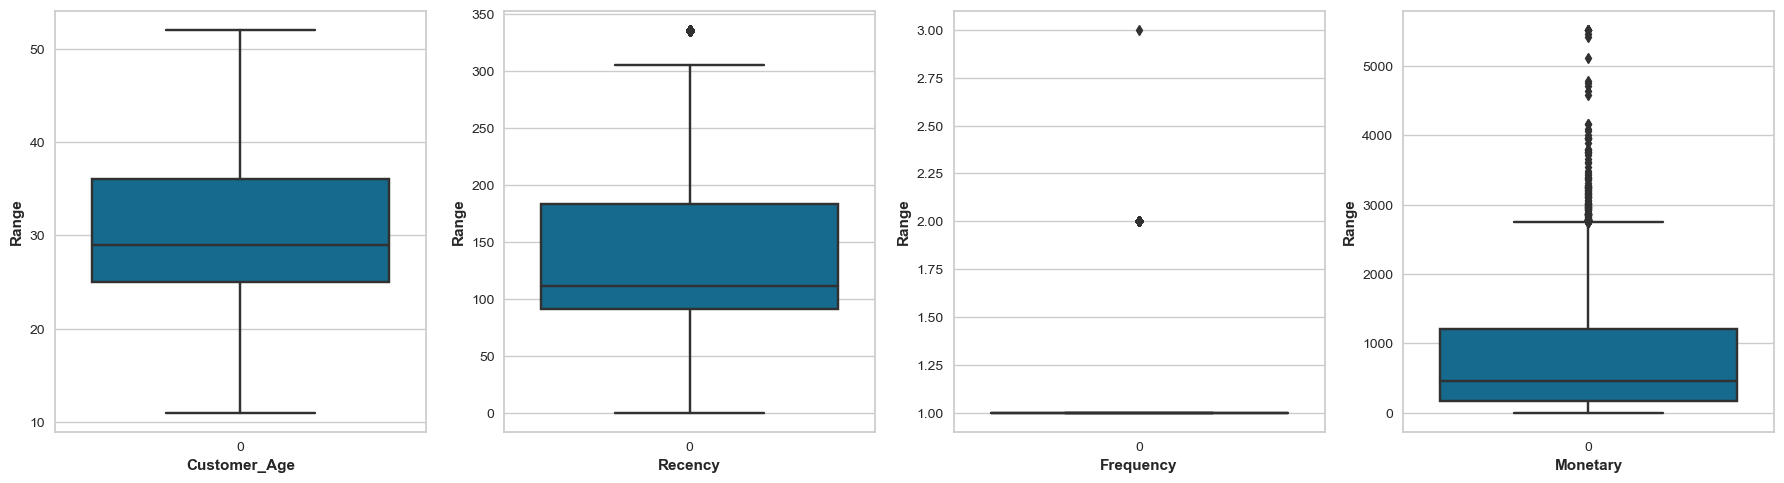

In [34]:
Columns = ["Customer_Age", "Recency", "Frequency", "Monetary"]
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(18, 5))

# Loop through columns and create boxplots
for i in range(4):
    sns.boxplot(data=df2[Columns[i]], ax=ax[i])
    ax[i].set_xlabel(Columns[i], fontweight="bold")  
    ax[i].set_ylabel('Range', fontweight="bold")  

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.8, wspace=0.4, hspace=0.4)

fig.tight_layout()
plt.show()

Here we found some outliers are present.

In [35]:
def treat_outliers(df2, column):
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df2[column] < lower_bound) | (df2[column] > upper_bound)
    df2.loc[outliers, column] = upper_bound  
    return df2

# list of columns to treat them.
columns_to_treat = ["Customer_Age", "Recency","Frequency", "Monetary"]

# Create a new DataFrame with treated outliers for each specified column to avoid modifying in main dataframe.
df2_treated = df2.copy() 
# Apply the treat_outliers function to each specified column
for column in columns_to_treat:
    df2_treated = treat_outliers(df2_treated, column)

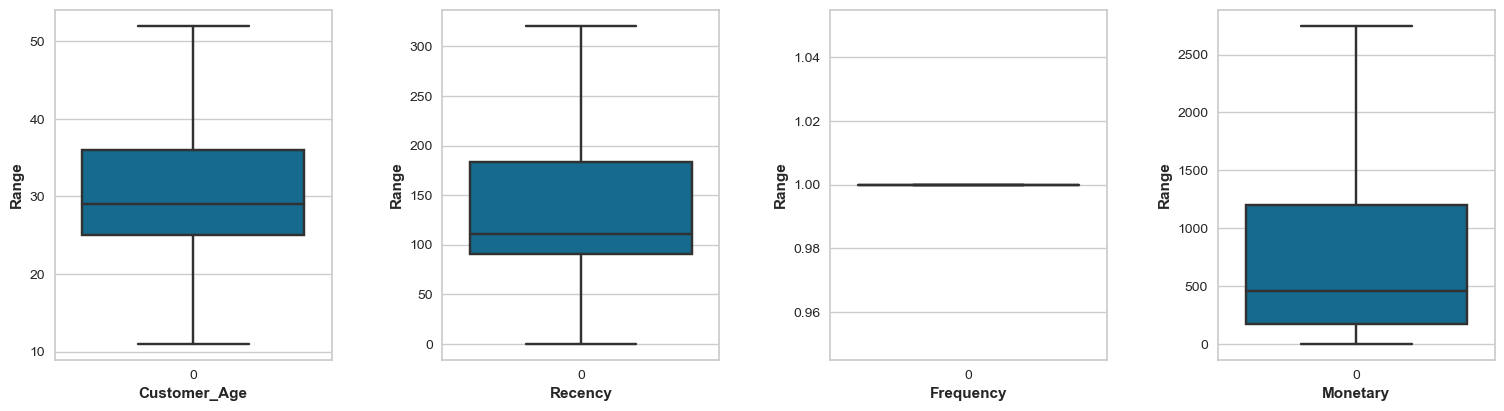

In [36]:
Columns = ["Customer_Age", "Recency", "Frequency", "Monetary"]
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(18, 5))

for i in range(4):
    sns.boxplot(data=df2_treated[Columns[i]], ax=ax[i])
    ax[i].set_xlabel(Columns[i], fontweight="bold")  
    ax[i].set_ylabel('Range', fontweight="bold")  

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.8, wspace=0.4, hspace=0.4)

fig.tight_layout()
plt.show()

### Treat Duplicate values 

In [37]:
newdf = df2.drop_duplicates()
col_names = df2.columns.values

###  Exploratory Data Analysis (EDA) 

#### Plot a graph that shows which city customers have highest funds in their accounts.

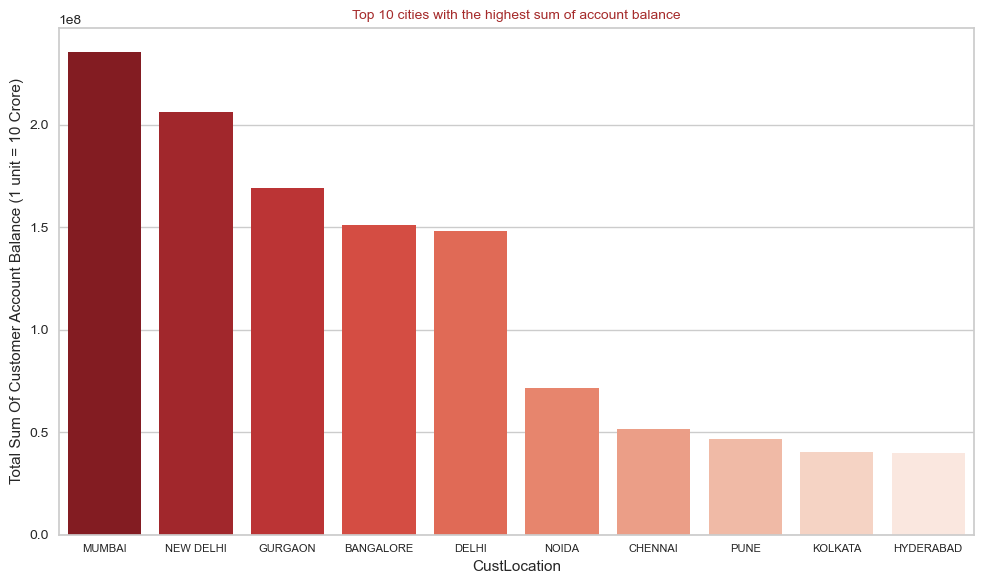

In [38]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax = sns.barplot(x=df1.groupby('CustLocation')['CustAccountBalance'].sum().sort_values(ascending=False)[:10].index,
                 y=df1.groupby('CustLocation')['CustAccountBalance'].sum().sort_values(ascending=False)[:10].values,
                 ci=None, palette='Reds_r', ax=ax1)

ax.tick_params(axis='x', labelsize=8)
ax.set_title('Top 10 cities with the highest sum of account balance',fontsize='10',color='brown')
ax.set_ylabel('Total Sum Of Customer Account Balance (1 unit = 10 Crore)')

plt.tight_layout()
plt.show()

Above graph shows top 10 cities with highest amount of money in the account of their customers.

#### (i)   Mumbai customers are first in terms of funds in their accounts.
#### (ii)  New Delhi customers are second in terms of funds in their accounts.
#### (iii) Gurgaon customers are third in terms of funds in their accounts.

In [39]:
TOTAL = df1[df1["CustLocation"] == 'MUMBAI']["CustAccountBalance"].sum()
print(f'Total Account balance of customers in Mumbai: {TOTAL}')

Total Account balance of customers in Mumbai: 235466514


#### Plot a graph that shows Customers from which city have transacted the highest amount? 

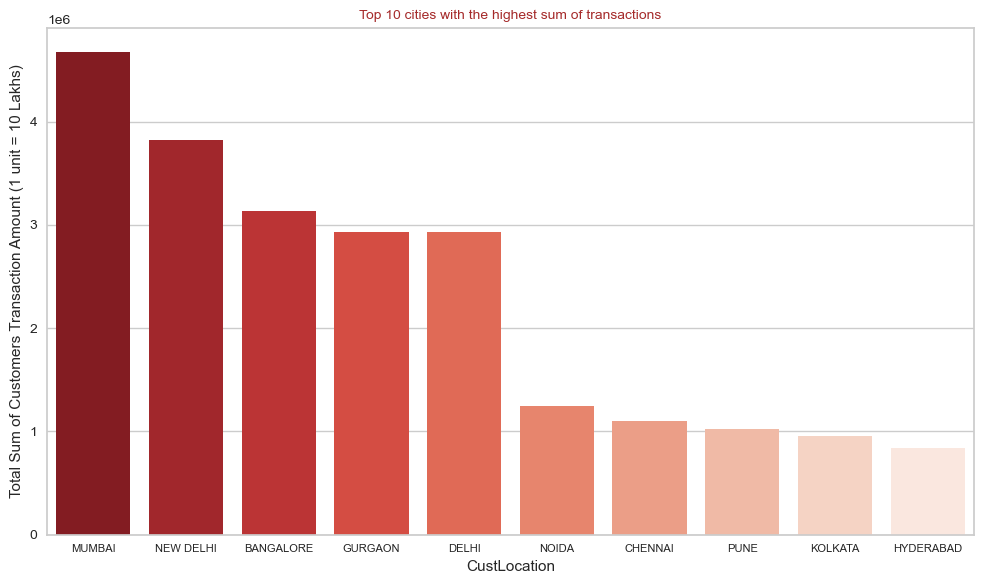

In [40]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax = sns.barplot(x=df1.groupby('CustLocation')['TransactionAmount (INR)'].sum().sort_values(ascending=False)[:10].index,
                 y=df1.groupby('CustLocation')['TransactionAmount (INR)'].sum().sort_values(ascending=False)[:10].values,
                 ci=None, palette='Reds_r', ax=ax1)

ax.tick_params(axis='x', labelsize=8)

ax.set_title('Top 10 cities with the highest sum of transactions',fontsize='10',color='brown')

ax.set_ylabel('Total Sum of Customers Transaction Amount (1 unit = 10 Lakhs)')

plt.tight_layout()
plt.show()

Above graph shows top 10 cities customers have transacted the highest amount.

#### (i)   Mumbai customers have first in terms transacted highest amount.
#### (ii)  New Delhi customers have second in terms transacted highest amount.
#### (iii) Bangalore customers have third in terms transacted highest amount.

In [41]:
TOTAL = df1[df1["CustLocation"] == 'MUMBAI']["TransactionAmount (INR)"].sum()
print(f'Total Transaction Amount of Customers in Mumbai: {TOTAL}')

Total Transaction Amount of Customers in Mumbai: 4674292


#### How much amount transacted by female and male customers?

#### By graph: -

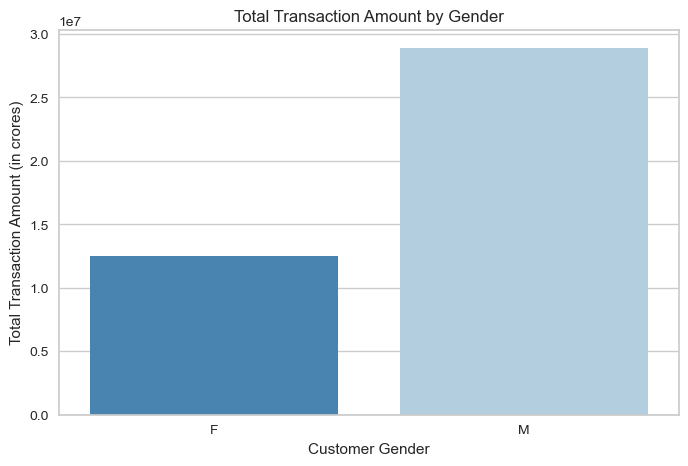

In [42]:
total_transaction_by_gender = df1.groupby('CustGender')['TransactionAmount (INR)'].sum().reset_index()

fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='CustGender', y='TransactionAmount (INR)', data=total_transaction_by_gender, palette='Blues_r')

ax.set_title('Total Transaction Amount by Gender')
ax.set_xlabel('Customer Gender')
ax.set_ylabel('Total Transaction Amount (in crores)')

plt.show()

#### Through coding: -

In [43]:
df1.groupby('CustGender')['TransactionAmount (INR)'].sum().reset_index()

,CustGender,TransactionAmount (INR)
0,F,12517017
1,M,28889561


Here we find out that Male customers transact more amount than females.

#### What is the total account balance of male and female accounts?

#### By graph: - 

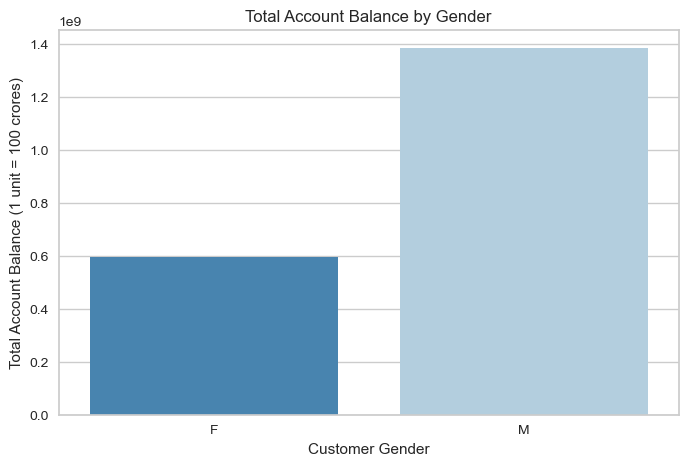

In [44]:
total_balance = df1.groupby('CustGender')['CustAccountBalance'].sum().reset_index()

fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='CustGender', y='CustAccountBalance', data=total_balance, palette='Blues_r')

ax.set_title('Total Account Balance by Gender')
ax.set_xlabel('Customer Gender')
ax.set_ylabel('Total Account Balance (1 unit = 100 crores)')

plt.show()

#### Through coding: -

In [45]:
df1.groupby('CustGender')['CustAccountBalance'].sum().reset_index()

,CustGender,CustAccountBalance
0,F,594311314
1,M,1385364111


Here we find out that Male Customers have more money in their accounts.

#### Create a graph that shows daywise total transaction amount? 

#### By Graph: -

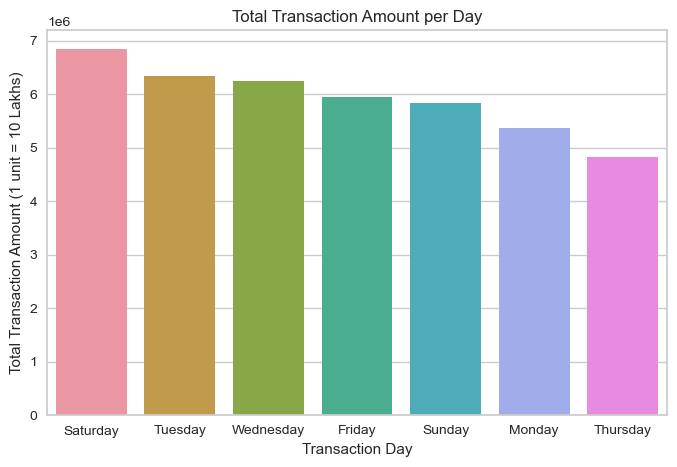

In [46]:
total_balance = df1.groupby('Transaction_Day')['TransactionAmount (INR)'].sum().sort_values(ascending=False).reset_index()

fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x='Transaction_Day', y='TransactionAmount (INR)', data=total_balance)

ax.set_title('Total Transaction Amount per Day')
ax.set_xlabel('Transaction Day')
ax.set_ylabel('Total Transaction Amount (1 unit = 10 Lakhs)')

plt.show()

#### By Coding: -

In [47]:
df1.groupby('Transaction_Day')['TransactionAmount (INR)'].sum().sort_values(ascending=False).reset_index()

,Transaction_Day,TransactionAmount (INR)
0,Saturday,6849814
1,Tuesday,6347306
2,Wednesday,6249696
3,Friday,5941389
4,Sunday,5830705
5,Monday,5366676
6,Thursday,4820992


Here we find out that "Saturday" is the day in which customers do maximum amount of transaction i.e, 6849814 and "Thursday" is the day in which customers do minimum amount of transaction i.e, 4820992.

#### Create a graph that shows month wise total transaction amount? 

#### By graph: -

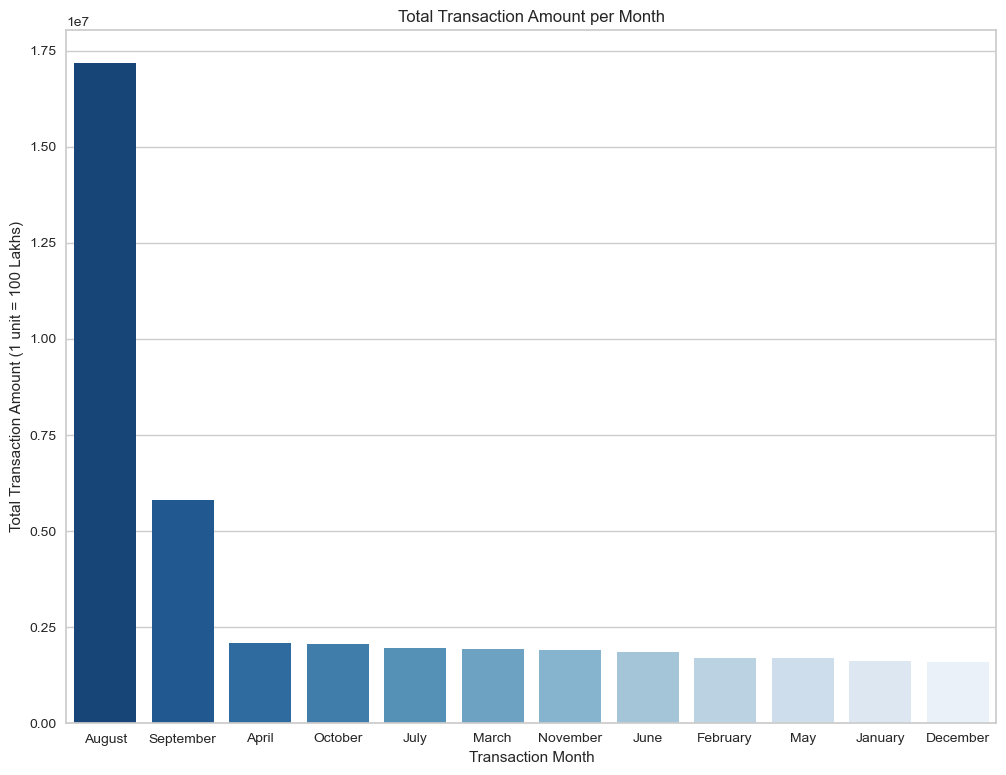

In [48]:
total_balance = df1.groupby('Transaction_Month')['TransactionAmount (INR)'].sum().sort_values(ascending=False).reset_index()

fig, ax = plt.subplots(figsize=(12,9))
sns.barplot(x='Transaction_Month', y='TransactionAmount (INR)', data=total_balance, palette='Blues_r')

ax.set_title('Total Transaction Amount per Month')
ax.set_xlabel('Transaction Month')
ax.set_ylabel('Total Transaction Amount (1 unit = 100 Lakhs)')

plt.show()

#### By Coding: -

In [49]:
df1.groupby('Transaction_Month')['TransactionAmount (INR)'].sum().sort_values(ascending=False).reset_index()

,Transaction_Month,TransactionAmount (INR)
0,August,17167496
1,September,5805288
2,April,2096231
3,October,2064905
4,July,1950706
5,March,1936916
6,November,1901766
7,June,1855201
8,February,1706042
9,May,1703410


Here we find out that "August" is the month in which customers do maximum amount of transaction i.e, 17167496 and "December" is the month in which customers do minimum amount of transaction i.e, 1600667.

#### Try to find which age group of customers do maximum transaction Amount

#### By Graph: -

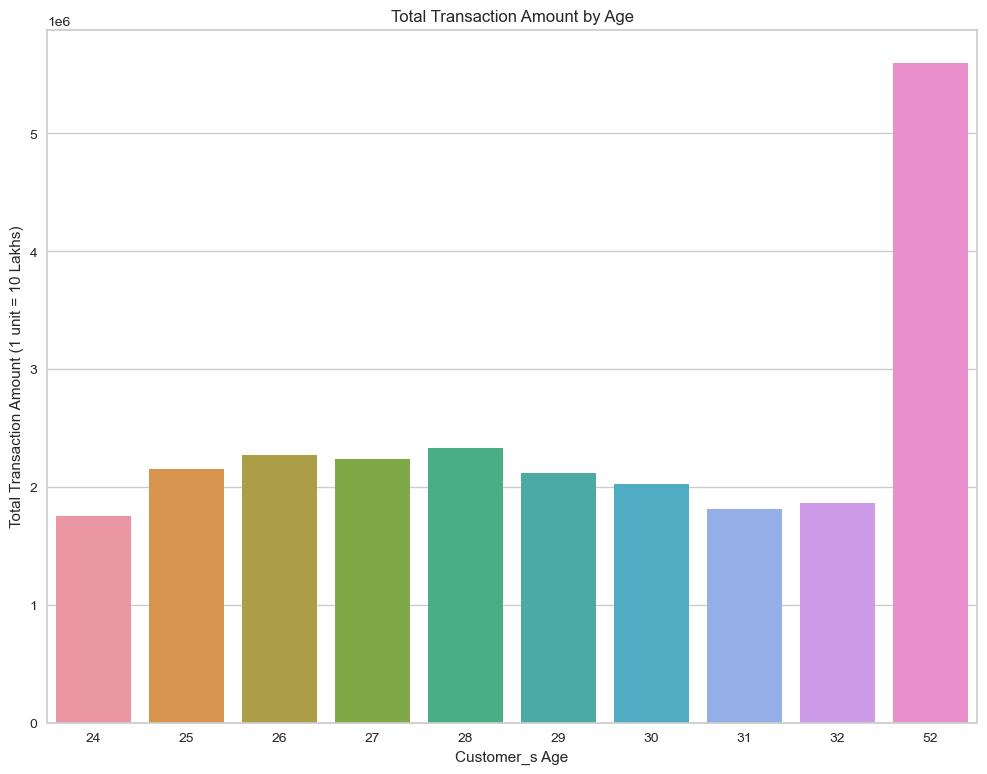

In [50]:
total_balance = df1.groupby('Customer_Age')['TransactionAmount (INR)'].sum().sort_values(ascending=False)[:10].reset_index()

fig, ax = plt.subplots(figsize=(12,9))
sns.barplot(x='Customer_Age', y='TransactionAmount (INR)', data=total_balance)

ax.set_title("Total Transaction Amount by Age")
ax.set_xlabel('Customer_s Age')
ax.set_ylabel('Total Transaction Amount (1 unit = 10 Lakhs)')

plt.show()

#### By Coding: -

In [51]:
df1.groupby('Customer_Age')['TransactionAmount (INR)'].sum().sort_values(ascending=False)[:10].reset_index()

,Customer_Age,TransactionAmount (INR)
0,52,5600298
1,28,2326087
2,26,2273739
3,27,2238257
4,25,2148751
5,29,2119796
6,30,2024868
7,32,1861037
8,31,1811682
9,24,1752830


Here we find out 52 years old age group customers do maximum amount of transaction i.e, 5600298  

#### Try to find which age group of customers has maximum account balance?

#### By Graph: - 

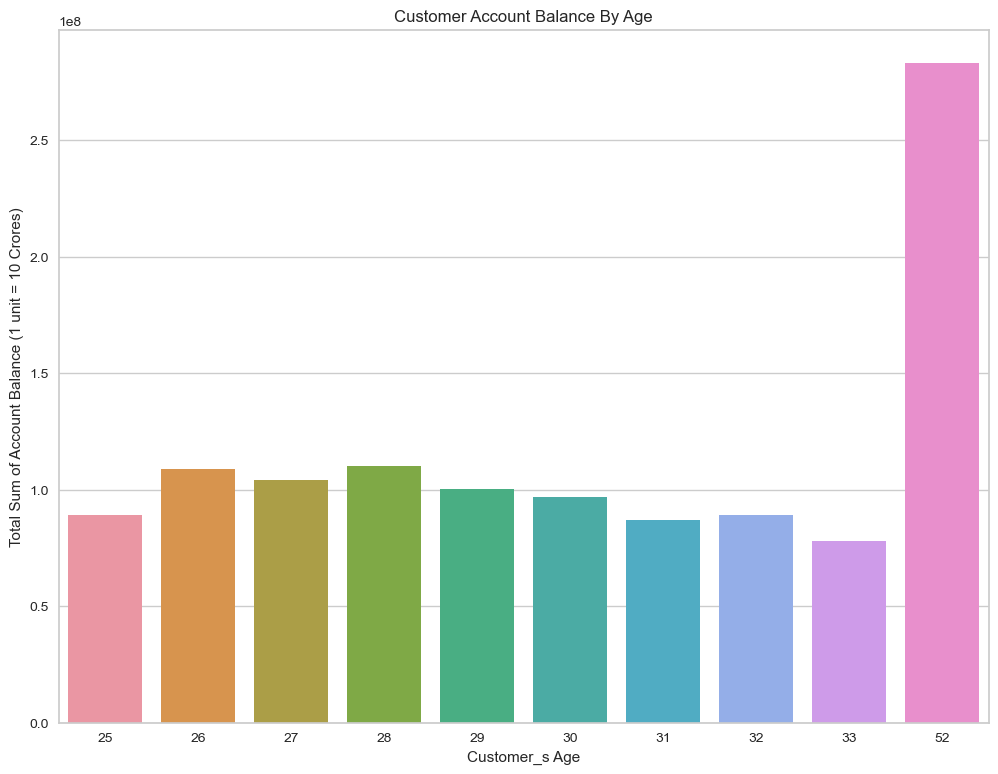

In [52]:
total_balance = df1.groupby('Customer_Age')['CustAccountBalance'].sum().sort_values(ascending=False)[:10].reset_index()
fig, ax = plt.subplots(figsize=(12,9))
sns.barplot(x='Customer_Age', y='CustAccountBalance', data=total_balance)

ax.set_title('Customer Account Balance By Age')
ax.set_xlabel('Customer_s Age')
ax.set_ylabel('Total Sum of Account Balance (1 unit = 10 Crores)')

plt.show()

#### By Coding: - 

In [53]:
df1.groupby('Customer_Age')['CustAccountBalance'].sum().sort_values(ascending=False)[:10].reset_index()

,Customer_Age,CustAccountBalance
0,52,283298632
1,28,110125397
2,26,108668732
3,27,104169975
4,29,100301136
5,30,96728555
6,25,89278585
7,32,88977532
8,31,86933577
9,33,77787014


Here we find out 52 years old age group customers has maximum amount in their accounts i.e, 283298632

## Segmentation Method

### (a) Clustering Algorithm

### K-Means
K-Means is a heuristic algorithm used for clustering data based on a measure of closeness. It groups data into K clusters, where K represents the number of desired clusters. The algorithm works iteratively by moving the centroids (cluster centers) to the mean position of their constituent points and reassigning 	data instances to their closest clusters. This process continues iteratively until no significant change in the cluster centers is possible, leading to the convergence of the algorithm.


### (b) Dimensionality Reduction
###       PCA (Principal Components Analysis)
Principal Component Analysis (PCA) is a widely used technique in machine learning and statistics for reducing the dimensionality of data while preserving as much variance as possible. It achieves this by transforming the original features into a new set of orthogonal (uncorrelated) features called principal components.

## Validation Technique/ Evaluation Technique
### Silhouette Score
The Silhouette Score is a way to measure how well data points are clustered. Imagine you have some data and you're trying to group similar points together. The Silhouette Score tells you how close each point is to the other points in its own group compared to the closest neighboring group.

In simpler terms, it's like giving each data point a grade on how well it fits with its group. If a point is really close to other points in its group and pretty far from points in other groups, it gets a high grade (good silhouette score). But if a point is sort of in the middle, not too close to its group members and not too far from neighboring groups, it gets a lower grade (lower silhouette score). So, the higher the Silhouette Score is for the whole dataset, the better the clustering is working. 
#### Silhouette score range is (-1 to 1). It means,
If Silhouette score is near to 1 or equal to 1 : The clustering of datapoints is good and if silhouette score is near to -1 or equal to -1 : The clustering of datapoints is not good. We should have to use another technique or algorithm for better clustering.


## Segmentation Implementation

### Standarized The Data

In [54]:
scaler = StandardScaler().fit(df2)
features = scaler.transform(df2)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,Customer_Age,Recency,Frequency,Monetary
0,-0.439630,1.323215,-0.094538,0.695466
1,-1.001010,0.581779,-0.094538,0.405920
2,-0.551906,-0.232585,-0.094538,-0.452695
3,-0.439630,0.946420,-0.094538,-0.307922
4,0.346302,1.687855,-0.094538,-0.707718


#### Applying K-Means clustering 

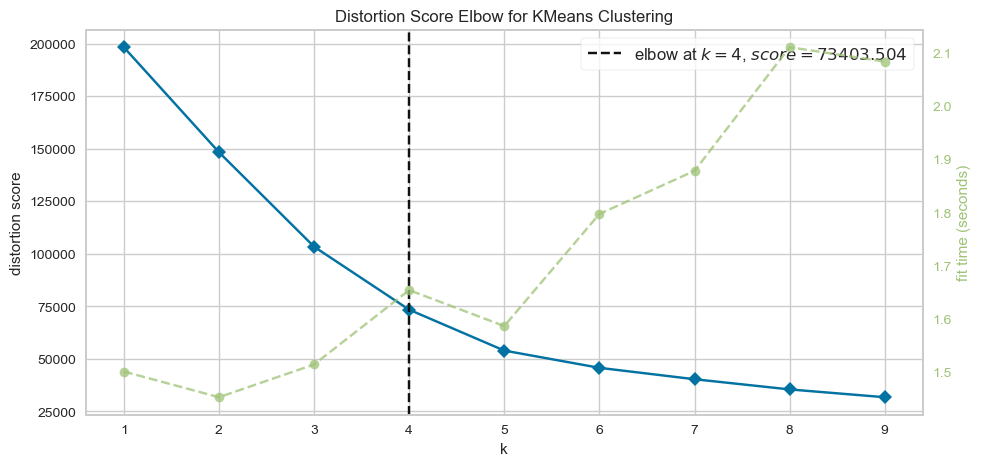

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10),size=(1080, 500))

visualizer.fit(scaled_features)     
visualizer.show()                   

Using the Elbow method, we can see that the optimal number of clusters is k=4. Next we can run the K-means algorithm 
using k=4 and calculate the Silhouette score.

#### Finding Silhouette Score

In [56]:
kmeans = KMeans(n_clusters = 4, init='k-means++',random_state=42)
kmeans.fit(scaled_features)

# Silhouette score
print("silhouette_score is :",silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))

silhouette_score is : 0.40291947407286166


As you can see in the results, the silhouette_score is : 0.40, which implies the model is not a bad model. However,
we can keep improve this model more. In the context of our data with features 'Customer_Age', 'Recency', and 'Monetary',
applying PCA can potentially help improve the cluster separation by reducing noise and capturing the most significant 
patterns of variation.

#### Applying PCA (Principal Component Analysis)

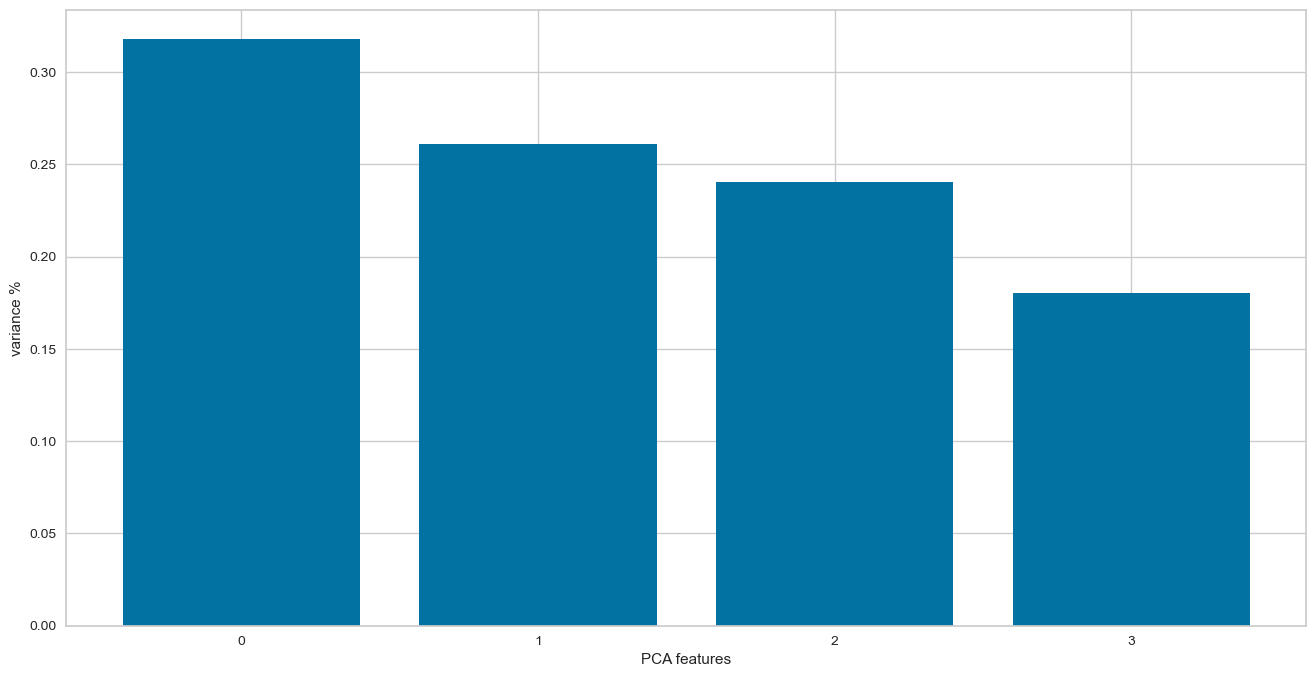

In [57]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(scaled_features)

features = range(pca.n_components_)
plt.figure(figsize=(16,8))
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

Following the PCA results, I am only considering the first two components which explains more than 60% of the dataset variance. Now these two components become the new input features for our clustering model. Next, let's apply the same 'Elbow method' I applied before to find the optimal K.

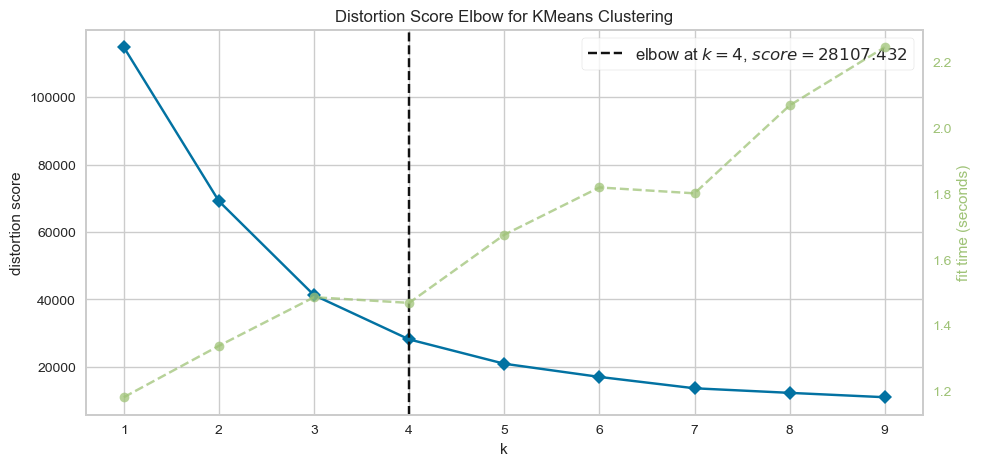

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10),size=(1080, 500))

visualizer.fit(PCA_components.iloc[:,:2])      
visualizer.show()  

From the above visualization, we can see that the optimal number of clusters is k=4. So, Run model applying K =4 and calculate its Silhouette score.

In [60]:
model = KMeans(n_clusters=4, init='k-means++',random_state=42)
model.fit(PCA_components.iloc[:,:2])

# silhouette score
print("silhouette_score is :",silhouette_score(PCA_components.iloc[:,:2], model.labels_, metric='euclidean')) 

silhouette_score is : 0.48025319823493984


Compared to the previous silhouette score which was 0.40, now we have a higher score of 0.48 implying the new model is better than the previous model.

### Fit and Predict Model 

In [61]:
clusters = model.fit_predict(PCA_components.iloc[:,:2])
scaled_features["new_label"] = clusters
scaled_features.head()

,Customer_Age,Recency,Frequency,Monetary,new_label
0,-0.439630,1.323215,-0.094538,0.695466,0
1,-1.001010,0.581779,-0.094538,0.405920,1
2,-0.551906,-0.232585,-0.094538,-0.452695,1
3,-0.439630,0.946420,-0.094538,-0.307922,0
4,0.346302,1.687855,-0.094538,-0.707718,0


### Visualize The Data In Labels

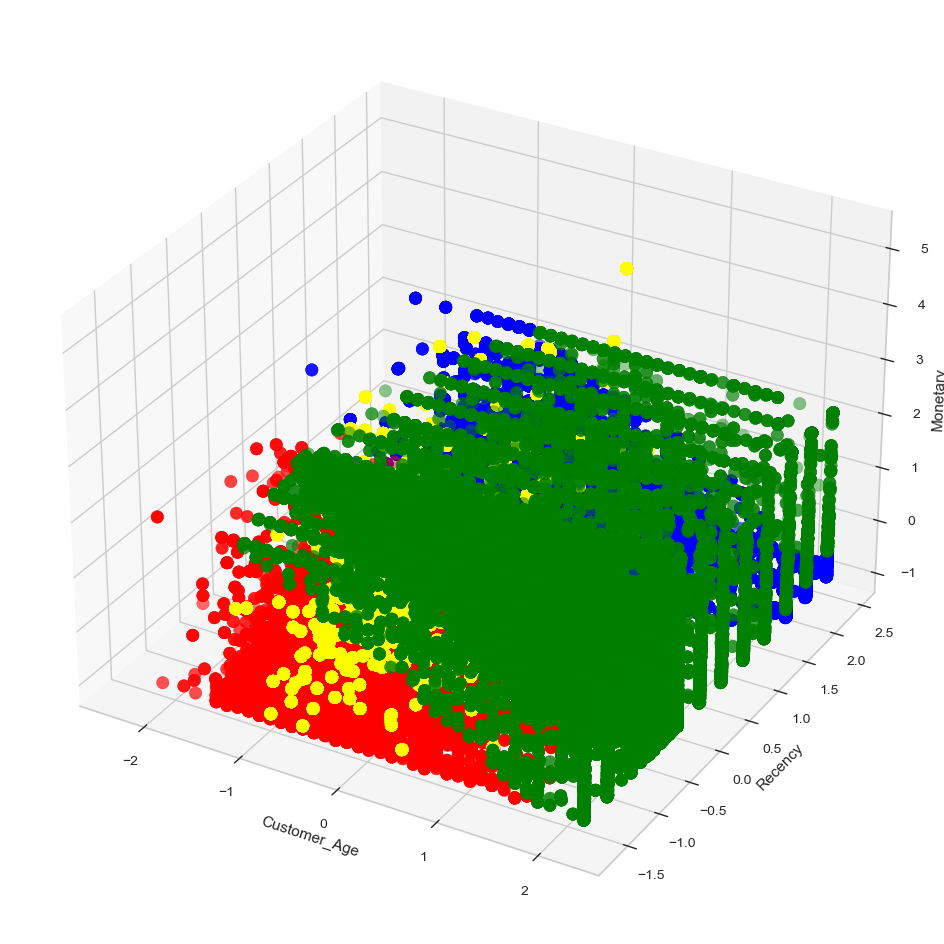

In [62]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

dff = scaled_features.groupby('new_label').sample(n=49581, replace=True) 

ax.scatter(dff.Customer_Age[dff["new_label"] == 0],dff["Recency"][dff["new_label"] == 0], dff["Monetary"][dff["new_label"] == 0], c='blue', s=80)
ax.scatter(dff.Customer_Age[dff["new_label"] == 1],dff["Recency"][dff["new_label"] == 1], dff["Monetary"][dff["new_label"] == 1], c='red', s=80)
ax.scatter(dff.Customer_Age[dff["new_label"] == 2],dff["Recency"][dff["new_label"] == 2], dff["Monetary"][dff["new_label"] == 2], c='green', s=80)
ax.scatter(dff.Customer_Age[dff["new_label"] == 3],dff["Recency"][dff["new_label"] == 3], dff["Monetary"][dff["new_label"] == 3], c='yellow', s=80)


ax.set_xlabel("Customer_Age")
ax.set_ylabel("Recency")
ax.set_zlabel("Monetary")
plt.show()

Looking at the above graph, we can conclude that the cluster separation provided by the model is more compelling. 

### Finalize Model

We use PCA applies K-Means model. Because of their silhouette score i.e, [0.48] which is a good score or greater than a simple K-Means thats why cluster separation provided by the model is more compelling. We can see group better.

## Segmentation Analysis and Visualization

In [63]:
pred = model.predict(PCA_components.iloc[:,:2])
df2['cluster'] = pred
avg_df = df2.groupby(['cluster'], as_index=False).mean()

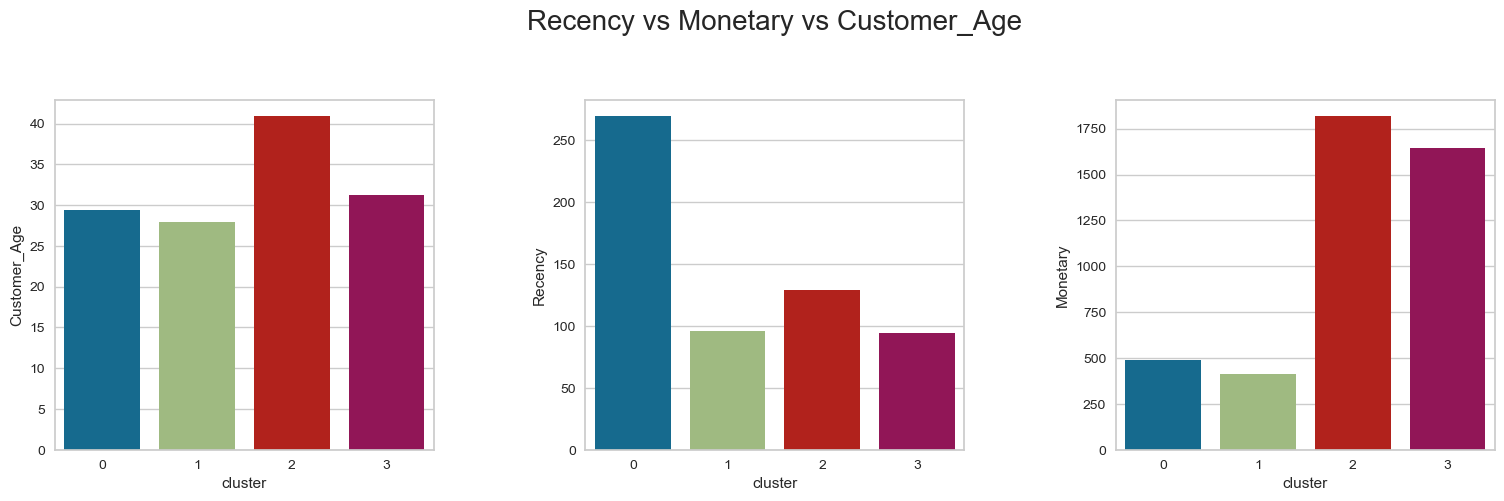

In [64]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
sns.barplot(x='cluster',y='Customer_Age',data=avg_df ,ax=ax[0])
sns.barplot(x='cluster',y='Recency',data=avg_df, ax=ax[1])
sns.barplot(x='cluster',y='Monetary',data=avg_df, ax=ax[2])
plt.suptitle('Recency vs Monetary vs Customer_Age',fontsize=20)
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.8,wspace=0.4,hspace=0.4)
fig.tight_layout()
plt.show()

### From the above graphs we can conclude the following: -
#### Cluster 0 : Shows high average recency and low monetary with average customer age around 29
#### Cluster 1 : Shows low average recency and low monetary with average customer age around 27
#### Cluster 2 : Shows moderate average recency and high monetary with average customer age around 41
#### Cluster 3 : Shows low average recency and high monetary with average customer age around 31

## Answers to the Questions We wanted to find are as below serial wise: - 

1. Mumbai Customers are first, New Delhi Customers are second & Gurgaon Customers are third in terms of amount in their accounts.
2. Mumbai Customers are first, New Delhi Customers are second & Bangalore Customers are third in terms of transacted highest amount.
3. Male customers do more amount of transactions.
4. Male customers have more money in their accounts.
5. "Saturday" is the day in which customers do maximum amount of transaction i.e, 6849814 and "Thursday" is the day in which customers do minimum amount of transaction i.e, 4820992.
6. "August" is the month in which customers do maximum amount of transaction i.e, 17167496 and "December" is the month in which customers do minimum amount of transaction i.e, 1600667.
7. Customers of 52 years age do maximum amount of transaction.
8. Customers of 52 years age have maximum balance in their accounts.

## Business Insights & Recommendations: - 

From the above, we get -

### Number 1.

    (a) Customer’s whose average age around 29 are lies in top 5 in list of customers age group which have maximum account  balance.
    (b) Average Monetary value of these customers is low & their average recency value is high. 
    
    Therefore, we will offer them to make FD of their amount (with different tenures i.e, as long as possible) which will be profitable for both, customers & bank also.
    
#### Customer benefit: -
    They will get high interest as compare to normal.
#### Bank benefit: -
    Bank will earn double interest by renting the FD money.

### Number 2. 

    (a) Customer’s whose average age around 27 has high amount in their accounts.
    (b) Average Recency value of these customers is low.

    Due to their low recency it becomes easier for the bank employees to persuade them to invest their money in schemes that will be beneficial to both the parties. For example – Motivate them to invest money in government schemes (like Sukanya Samriddhi Yojana).
#### Customer benefit: -
    They will get good interest rates and will also get tax exemption.

#### Bank benefit: -
    Bank will get money for long term which is profitable for it.

### Number 3.

    (a) Cutomer's whose average age around 41 has low amount in their accounts.
    (b) Average Recency value of these customers is moderate and average monetary value is high.
    
    Therefore, we will give some offers to them to decrease their recency value.
#### Bank benefit: -
     Bank will get more money after decreasing their average recency value because their average monetary value is
     already high.

### Number 4.

    (a) Cutomer's whose average age around 31 has moderate amount in their accounts.
    (b) Average Recency value of these customers is low and average monetary value is high.
    
    So we will convince them to take loan.
#### Customer benefit: -
     They will get money for their future plan or to start some startup.
#### Bank benefit: -
    Bank gets interest.